In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

How many rows and columns are in `gdp_df`? 7176 rows × 4 columns

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


What are the data types of each column? object

In [4]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [6]:
gdp_df.columns = ['Country','Year', 'GDP_Per_Capita']

In [7]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [8]:
%who

gdp_df	 np	 pd	 plt	 sns	 


In [9]:
#sorting group by & count
gdp_df.groupby ('Country').count()

,Year,GDP_Per_Capita
Country,,
Afghanistan,19,19
Africa Eastern and Southern,31,31
Africa Western and Central,31,31
Albania,31,31
Algeria,31,31
...,...,...
Vietnam,31,31
West Bank and Gaza,27,27
World,31,31


In [10]:
#sorting out group by & count
gdp_df.groupby ('Country')['Country'].count()

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Country, Length: 242, dtype: int64

In [11]:
info_avail = gdp_df.groupby ('Country')['Country'].value_counts()

In [12]:
type(info_avail)

pandas.core.series.Series

In [13]:
#make series a df
info_avail = info_avail.to_frame()

In [14]:
type(info_avail)

pandas.core.frame.DataFrame

In [15]:
info_avail

,count
Country,
Afghanistan,19
Africa Eastern and Southern,31
Africa Western and Central,31
Albania,31
Algeria,31
...,...
Vietnam,31
West Bank and Gaza,27
World,31


In [16]:
info_avail.columns

Index(['count'], dtype='object')

In [17]:
info_avail.index

Index(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       ...
       'United States', 'Upper middle income', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Vietnam', 'West Bank and Gaza', 'World', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=242)

In [18]:
info_avail.reset_index()

,Country,count
0,Afghanistan,19
1,Africa Eastern and Southern,31
2,Africa Western and Central,31
3,Albania,31
4,Algeria,31
...,...,...
237,Vietnam,31
238,West Bank and Gaza,27
239,World,31
240,Zambia,31


In [23]:
info_avail.sort_values('count', ascending=False) 

,count
Country,
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (excluding high income),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10


In [24]:
info_avail = info_avail.reset_index()

In [25]:
info_avail

,Country,count
0,Afghanistan,19
1,Africa Eastern and Southern,31
2,Africa Western and Central,31
3,Albania,31
4,Algeria,31
...,...,...
237,Vietnam,31
238,West Bank and Gaza,27
239,World,31
240,Zambia,31


How many countries have data for all years? 
Which countries are missing many years of data? 
Look at the number of observations per year. What do you notice?

In [27]:
info_avail['count'].value_counts()[31]

205

In [31]:
no_data = info_avail.loc[info_avail['count'] == 31, 'Country'].tolist()

In [33]:
type(no_data)
#no_data holds list of countries w/o 31 years of data

list

GRAPHS: histogram, a density plot, a boxplot, and a violin plot

<Axes: ylabel='Frequency'>

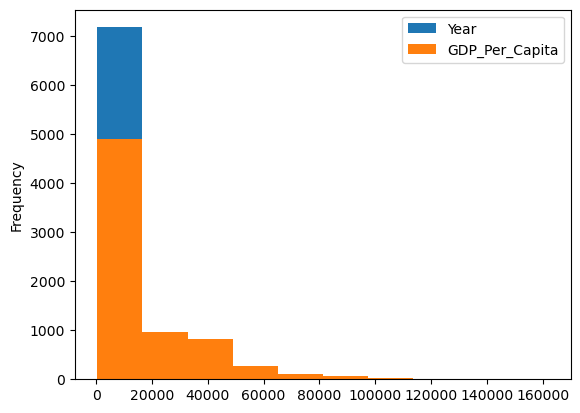

In [41]:
gdp_df.plot.hist()

<Axes: ylabel='Density'>

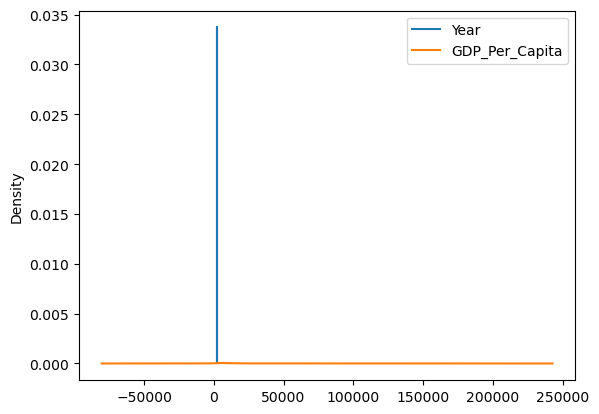

In [40]:
gdp_df.plot.density()

<Axes: >

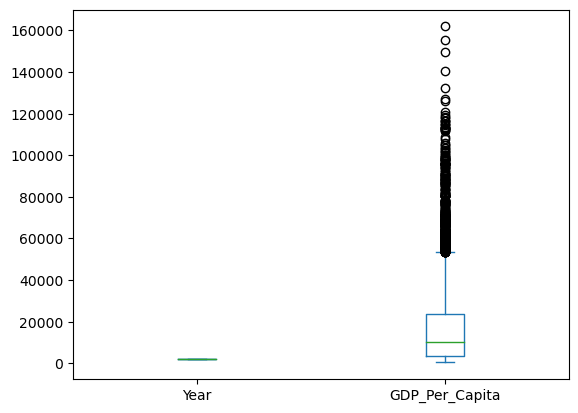

In [42]:
gdp_df.plot.box()

9. What was the median GDP per capita value in 2020?

In [36]:
gdp_df['GDP_Per_Capita'].median()

9990.901201288065

In [20]:
#want to group by country, then select where valuecount is 31.